## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy import stats 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data_df.loc[(combined_data_df.duplicated()),['Mouse ID','Timepoint']]
duplicate

,Mouse ID,Timepoint
909,g989,0


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Final_df = combined_data_df.loc[combined_data_df["Mouse ID"]!='g989']
Final_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
len(Final_df["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen = Final_df.groupby('Drug Regimen')
mean = round(drug_regimen['Tumor Volume (mm3)'].mean(),2)
median= round(drug_regimen['Tumor Volume (mm3)'].median(),2)
variance= round(drug_regimen['Tumor Volume (mm3)'].var(),2)
std = round(drug_regimen['Tumor Volume (mm3)'].std(),2)
sem = round(drug_regimen['Tumor Volume (mm3)'].sem(),2)

# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({"Mean":mean,
                         "Median":median,
                         "Variance":variance,
                         "Standard Deviation":std,
                         "SEM":sem
                        })
#Minor Data Munging
summary_df = summary_df[['Mean','Median','Variance','Standard Deviation','SEM']]
summary_df.index.name = None

# Displaying Dataframe
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen = Final_df.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)":[('MEAN','mean'),('Median','median'),('Variance','var'),
                                                                                 ('Standard Deviation','std'),('SEM','sem')]})


#Flattening hierarchical indexes
drug_regimen.columns = ['_'.join(col).strip() 
                        for col in drug_regimen.columns.values]
drug_regimen.index.name = None

#Displaying the dataframe
drug_regimen

,Tumor Volume (mm3)_MEAN,Tumor Volume (mm3)_Median,Tumor Volume (mm3)_Variance,Tumor Volume (mm3)_Standard Deviation,Tumor Volume (mm3)_SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

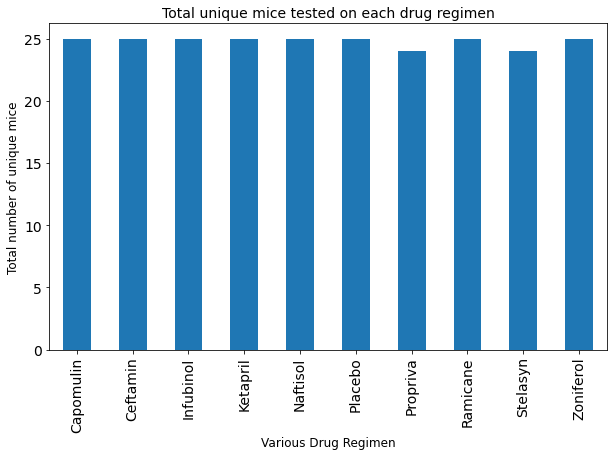

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Calculate the number of unique mice for each drug regimen
drug_regimen = Final_df.groupby('Drug Regimen')
data = drug_regimen["Mouse ID"].nunique()

# Plotting the graph
chart = data.plot(kind='bar',figsize=(10,6),fontsize = 14, alpha = 1)

# Set label for the axes
plt.title("Total unique mice tested on each drug regimen", fontsize =14)
plt.xlabel("Various Drug Regimen", fontsize =12)
plt.ylabel("Total number of unique mice", fontsize =12)

# Display the plot
plt.show()

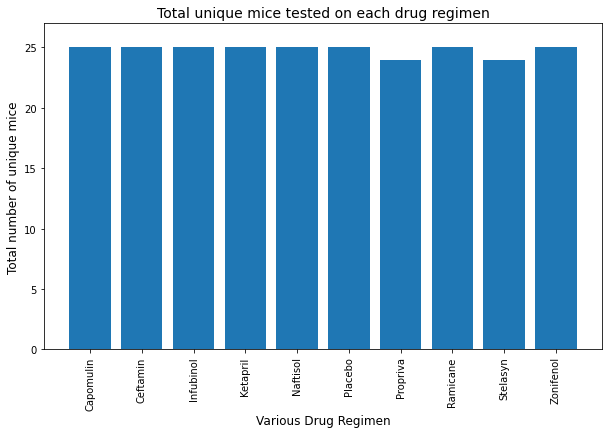

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_regimen = Final_df.groupby('Drug Regimen')
labels=["Capomulin","Ceftamin","Infubinol","Ketapril",
        "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zonifenol"]

x_axis = np.arange(0,len(drug_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)    
y_axis = drug_regimen["Mouse ID"].nunique()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(x_axis,y_axis)
plt.xticks(tick_locations,labels, rotation ='vertical')
plt.ylim(0,max(y_axis)+2)

# Set label for the axes
plt.title("Total unique mice tested on each drug regimen",fontsize =14)
plt.xlabel("Various Drug Regimen",fontsize =12)
plt.ylabel("Total number of unique mice",fontsize =12)

# Show the plot
plt.show()

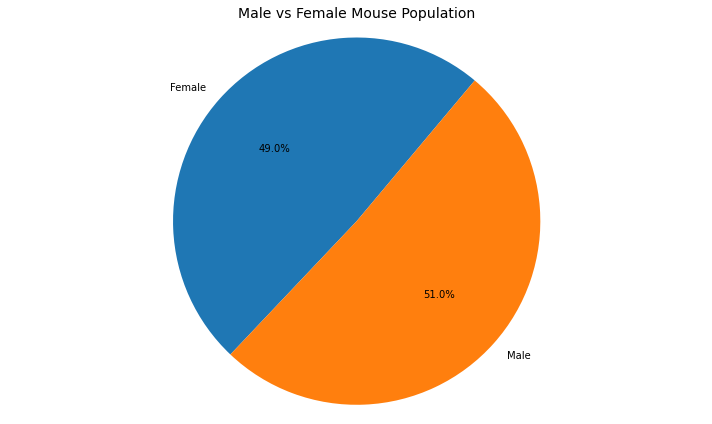

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distribution = Final_df.groupby('Sex').count()['Mouse ID']

chart = distribution.plot(subplots= True, kind='pie',figsize=(10,6),
        autopct="%1.1f%%", startangle=50)

#Set equal axis and labels
plt.axis("equal")
plt.title('Male vs Female Mouse Population',fontsize = 14)
plt.ylabel('')
plt.tight_layout()

# Show the plot
plt.show()

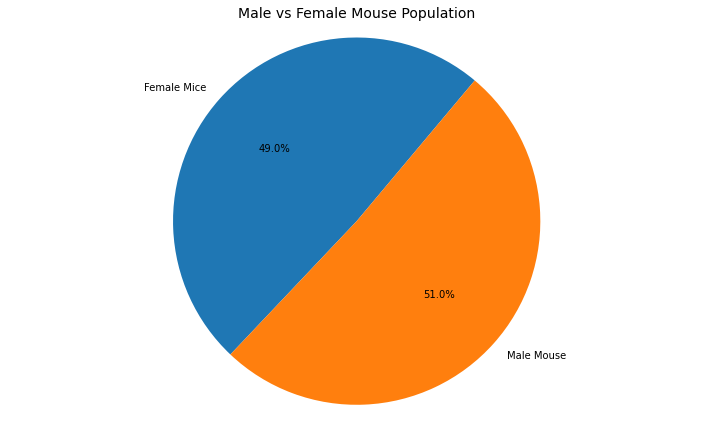

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = Final_df.groupby("Sex").count()["Mouse ID"]
gender = ["Female Mice", "Male Mouse"]

plt.figure(figsize=(10,6))
plt.pie(distribution, labels=gender,
        autopct="%1.1f%%",startangle=50)

#Set equal axis and labels
plt.axis("equal")
plt.title('Male vs Female Mouse Population',fontsize = 14)
plt.ylabel('')
plt.tight_layout()

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = Final_df.groupby('Mouse ID').max()['Timepoint']
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(max_tumor, Final_df,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for 'for loop' (and later for plot labels)

treatment_list =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    row = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol.append(row)
    
    # Determine outliers using upper and lower bounds
    quartiles = row.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = row.loc[(row < lower_bound) | (row > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


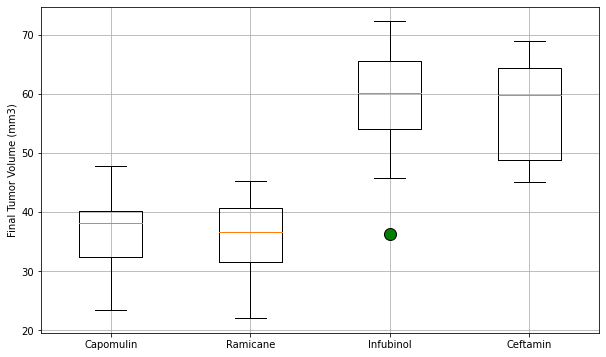

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of drugs selected above
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol, labels = treatment_list, flierprops = dict(markerfacecolor='green',markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Line and Scatter Plots

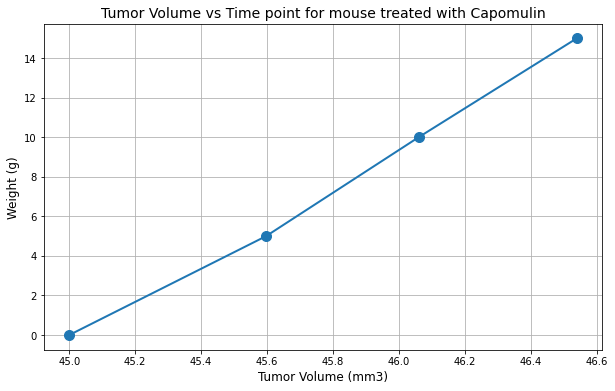

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of any random mouse(say r157) treated with Capomulin
abc = Final_df.loc[Final_df["Drug Regimen"]=='Capomulin']
xyz = Final_df.loc[Final_df["Mouse ID"]=='r157']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
x_axis = xyz["Tumor Volume (mm3)"]
y_axis = xyz["Timepoint"]
plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis, linewidth=2, markersize=10,marker="o")

# Add labels and title to plot
plt.title("Tumor Volume vs Time point for mouse treated with Capomulin",fontsize =14)
plt.xlabel("Tumor Volume (mm3)", fontsize =12)
plt.ylabel("Weight (g)", fontsize =12)
plt.grid(True)
plt.show()

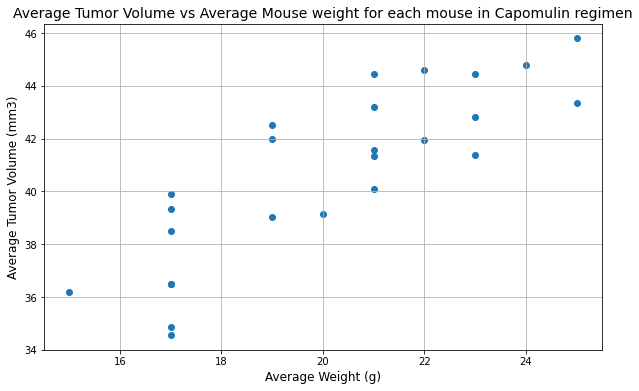

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
abc = Final_df.loc[Final_df["Drug Regimen"]=='Capomulin']
final =abc.groupby('Mouse ID').mean()

x_axis = final["Weight (g)"]
y_axis = final["Tumor Volume (mm3)"]

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.figure(figsize=(10,6))
plt.scatter(x_axis,y_axis)

# Add labels and title to plot
plt.title("Average Tumor Volume vs Average Mouse weight for each mouse in Capomulin regimen",fontsize =14)
plt.xlabel("Average Weight (g)",fontsize =12)
plt.ylabel("Average Tumor Volume (mm3)",fontsize =12)
plt.grid(True)
plt.show()

## Correlation and Regression

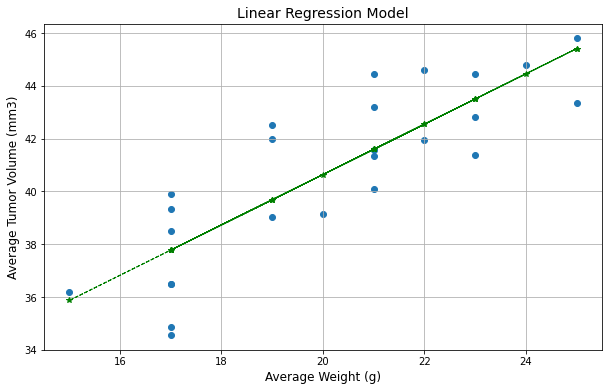

The linear regression equation is : y = 0.95x + 21.55
The correlation coefficient between mouse weight and avg tumor volume is 0.84


In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

abc = Final_df.loc[Final_df["Drug Regimen"]=='Capomulin']
final = abc.groupby('Mouse ID').mean()

# Determine x & y axis of a scatter plot
x_axis = final["Weight (g)"]
y_axis = final["Tumor Volume (mm3)"]

# Calculate linear regression
slope, intercept, rvalue, pvalue, std = stats.linregress(x_axis, y_axis)

# Create equation of line
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.plot(x_axis,regress_values, "--", marker="*", color="g",linewidth=1 )
plt.scatter(x_axis,y_axis)

# Add labels and title to plot
plt.title("Linear Regression Model",fontsize =14)
plt.xlabel("Average Weight (g)", fontsize =12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize =12)
plt.grid(True)
plt.show()

# Print linear regression equation
print(f"The linear regression equation is : {line_eq}")

# Calculate and print the correlation coefficient between mouse weight and average tumor volume
print(f"The correlation coefficient between mouse weight and avg tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")